In [ ]:
import pandas as pd
col_names = ["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age","label"]
df = pd.read_csv("diabetes.csv", header=None, names=col_names)
df = df.drop(0,axis=0).reset_index(drop=True)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


In [ ]:
feature_cols = ["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age"]
x = df[feature_cols]
y = df["label"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
display(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(614, 8)

(154, 8)

(614,)

(154,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier(criterion="entropy",random_state=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('y_pred:',y_pred)

y_pred: ['1' '0' '0' '0' '0' '0' '1' '1' '1' '1' '0' '0' '0' '0' '0' '1' '0' '1'
 '1' '0' '1' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '1' '1' '0' '0' '0'
 '1' '0' '1' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0'
 '0' '0' '0' '0' '1' '0' '1' '1' '1' '0' '0' '0' '1' '0' '1' '0' '1' '0'
 '0' '1' '0' '1' '0' '0' '1' '0' '1' '1' '1' '0' '0' '1' '0' '0' '0' '0'
 '1' '0' '0' '1' '0' '1' '1' '1' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0'
 '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '1' '1' '0' '1' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '1' '1' '0' '1']


In [ ]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix:',conf_mat)
Accuracy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy:',Accuracy)

confusion matrix: [[74 26]
 [26 28]]
Accuracy: 0.6623376623376623


<Axes: xlabel='Predicted', ylabel='Actual'>

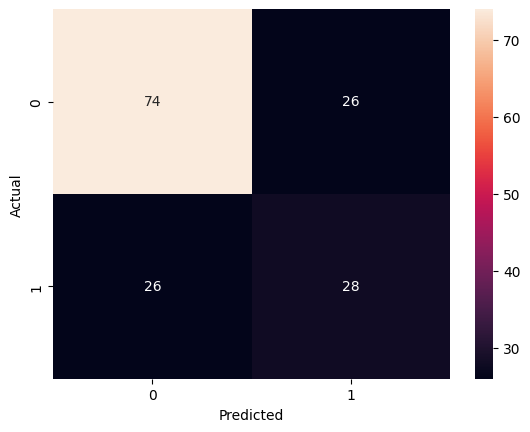

In [ ]:
import seaborn as sn
conf_mat=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(conf_mat,annot=True)